# Data Science for Beginners by Microsoft
## Module 1: Introduction | Lesson 1: Defining Data Science
##### Task 1A: Modify the code presented in 'notebook.ipynb' to find out related concepts in the field of Machine Learning.
<br><br>

**Goal**

As mentioned in Task 1A, I am going to perform **text mining** for the field of Machine Learning. I will use the page on Machine Learning from Wikipedia.


In [ ]:
# url is a tring variable that contains a web address
url = 'https://en.wikipedia.org/wiki/Machine_learning'

## Step 1: Getting the Data

In [ ]:
# importing the requests library
import requests

text = requests.get(url).content.decode('utf-8')



1) .get(): the get functions is used to retrieve data from a specified url <br><br>
2) .content: It retrieves the content of the HTTP response, which includes the raw HTML or data returned by the server.<br><br>
3) .decode('utf-8'): The decode() method is used to convert the raw content (which is in bytes) to a string.
    The 'utf-8' argument specifies the character encoding used for the conversion.


In [ ]:
print(text[:1000])

<!DOCTYPE html>
<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled vector-feature-custom-font-size-clientpref-disabled vector-feature-client-preferences-disabled" lang="en" dir="ltr">
<head>
<meta charset="UTF-8">
<title>Machine learning - Wikipedia</title>
<script>(function(){var className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-clientpref-1 vector-feature-main-menu-pinned-disabled vector-feature-limited-width-clientpref-1 vector-feature-limited-width-content-enabled ve

## Step 2: Transforming the Data

In [ ]:
from html.parser import HTMLParser

class MyHTMLParser(HTMLParser):
    script = False
    res = ""
    def handle_starttag(self, tag, attrs):
        if tag.lower() in ["script","style"]:
            self.script = True
    def handle_endtag(self, tag):
        if tag.lower() in ["script","style"]:
            self.script = False
    def handle_data(self, data):
        if str.strip(data)=="" or self.script:
            return
        self.res += ' '+data.replace('[ edit ]','')

parser = MyHTMLParser()
parser.feed(text)
text = parser.res
print(text[:1000])

 Machine learning - Wikipedia Jump to content Main menu Main menu move to sidebar hide 
		Navigation
	 Main page Contents Current events Random article About Wikipedia Contact us Donate 
		Contribute
	 Help Learn to edit Community portal Recent changes Upload file Languages Language links are at the top of the page across from the title. Search Search Create account Log in Personal tools Create account Log in 
		Pages for logged out editors  learn more Contributions Talk Contents move to sidebar hide (Top) 1 History and relationships to other fields Toggle History and relationships to other fields subsection 1.1 Artificial intelligence 1.2 Data mining 1.3 Generalization 1.4 Statistics 1.5 Physics 2 Theory 3 Approaches Toggle Approaches subsection 3.1 Supervised learning 3.2 Unsupervised learning 3.3 Semi-supervised learning 3.4 Reinforcement learning 3.5 Dimensionality reduction 3.6 Other types 3.6.1 Self-learning 3.6.2 Feature learning 3.6.3 Sparse dictionary learning 3.6.4 Anomaly de

## Step 3: Getting Insights

In [ ]:
import sys
!{sys.executable} -m pip install nlp_rake

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 14.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.8 MB/s eta 0:00:00
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993224 sha256=8a467bd790bd27f5bda3ec865057f6dc849acce0636ae71a4fb0cad37baad1d6
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [ ]:
import nlp_rake
extractor = nlp_rake.Rake(max_words=3,min_freq=7,min_chars=5)
res = extractor.apply(text)
print(res)
print('Length of res is: ', len(res))

[('machine learning', 4.790267849063433), ('reinforcement learning', 4.746247915508616), ('artificial intelligence', 4.598490048043926), ('supervised learning', 4.589105058365758), ('wayback machine', 4.544019933554817), ('unsupervised learning', 4.514105058365759), ('data mining', 4.4759535655058045), ('mit press', 4.467532467532467), ('training data', 4.178731343283582), ('main article', 4.0), ('retrieved 2018-08-20', 3.897435897435898), ('retrieved 2022-01-17', 3.7585470085470085), ('learning', 2.3891050583657587), ('models', 2.125), ('algorithms', 2.075), ('methods', 1.962962962962963), ('classification', 1.9565217391304348), ('systems', 1.935483870967742), ('training', 1.925), ('model', 1.8837209302325582), ('input', 1.7058823529411764), ('process', 1.6666666666666667), ('performance', 1.5), ('features', 1.4545454545454546), ('field', 1.3529411764705883), ('found', 1.3333333333333333), ('learn', 1.3076923076923077), ('introduction', 1.3), ('inputs', 1.25), ('output', 1.22222222222

## Step 4: Visualizing the Result

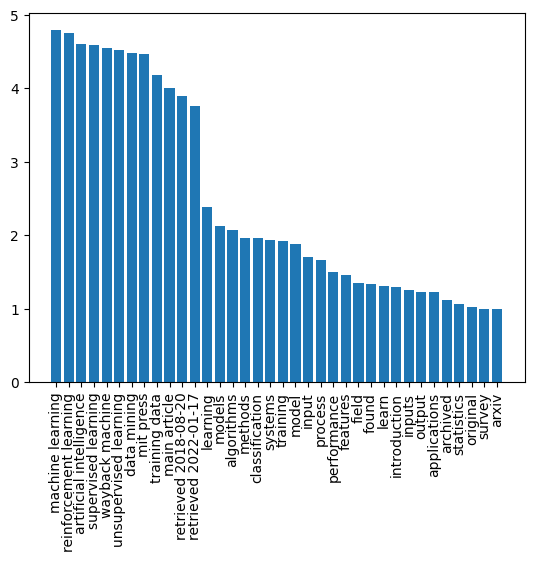

In [ ]:
import matplotlib.pyplot as plt

def plot(pair_list):
    k,v = zip(*pair_list)
    plt.bar(range(len(k)),v)
    plt.xticks(range(len(k)),k,rotation='vertical')
    plt.show()

plot(res)

In [ ]:
# Installing the worcloud library
!{sys.executable} -m pip install wordcloud

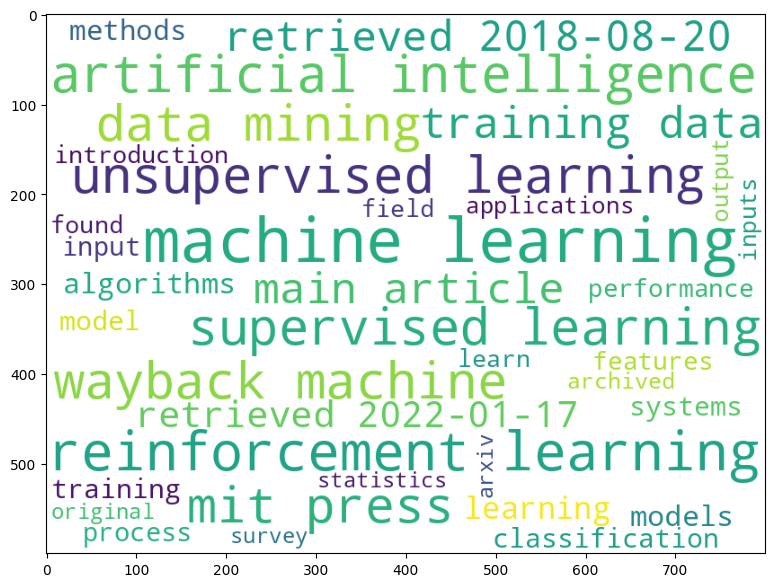

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

wc = WordCloud(background_color='white',width=800,height=600)
plt.figure(figsize=(15,7))
plt.imshow(wc.generate_from_frequencies({ k:v for k,v in res }))

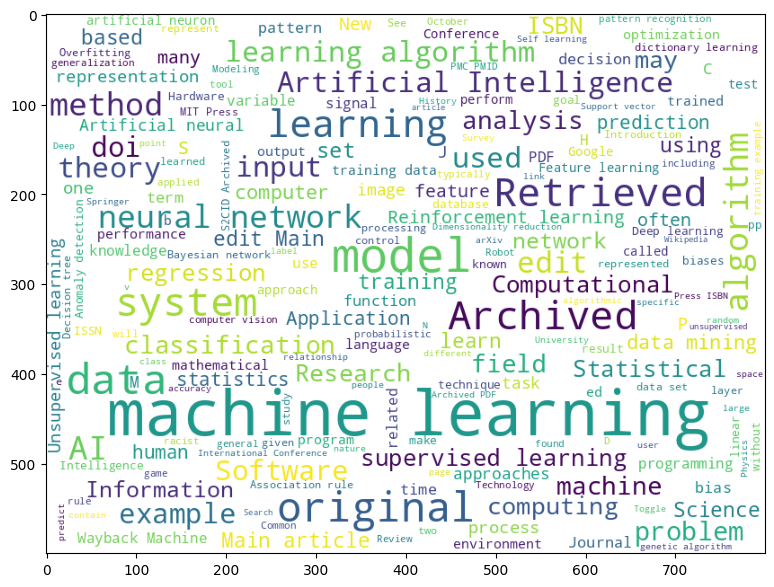

In [ ]:
plt.figure(figsize=(15,7))
plt.imshow(wc.generate(text))

## Conclusions

It is a good practice to start some advanced projects about **text mining** in the future. However, I'm not really satisfied with the visualization results for both tasks: Machine Learning and the previous one, Big Data. Such that, I think I need to improve some skills in HTML parsing topic because some words like **wayback machine** are not related to the topic we are mining its text, but they exist in the reference section of the Wikipedia page. So, handling that is a key challenge that could improve the words visualized in the word cloud.